In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [125]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect = True)
Base.classes.keys()

# reflect the tables

['measurement', 'station']

In [7]:
# We can view all of the classes that automap found
Measurement = Base.classes.measurement
Station = Base.classes.station

In [118]:
# Create our session (link) from Python to the DB
session = Session(engine)
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fbdac1c9af0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017,8,23)-dt.timedelta(days=365)
print("The beginning query date is", query_date)
yeardata = session.query(Measurement.date,Measurement.prcp ).filter(Measurement.date > dt.date(2016, 8, 22)).all()


('2017-08-23',)
The beginning query date is 2016-08-23


In [101]:
# Perform a query to retrieve the data and precipitation scores
Date = [date[0] for date in yeardata]
Precip = [date[1] for date in yeardata]

# Save the query results as a Pandas DataFrame and set the index to the date column
m_df = pd.DataFrame(yeardata, columns=["date","precip"])
m_df.set_index("date", inplace=True)
m_df = m_df.rename(columns={"date": "Date", "precip":"Precipitation"})
m_df.head(10)

,Precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [106]:
# Sort the dataframe by date
m_df = m_df.sort_values(by=["date"])
m_df = m_df.fillna(0)
m_df.head(20)

,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,2.15
2016-08-24,1.22


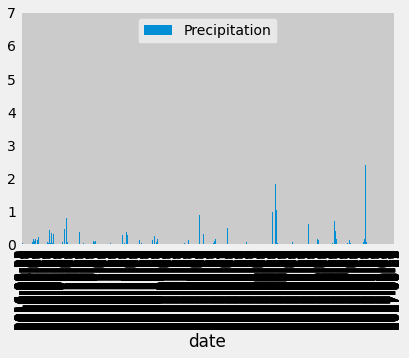

In [107]:
x_ticks = ["2016-08-23","2016-09-20","2016-10-20","2016-12-20","2017-01-20","2017-03-20","2017-05-20","2017-08-20"]

# Use Pandas Plotting with Matplotlib to plot the data
m_df.plot.bar(y="Precipitation", use_index=True)
xticks = x_ticks


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [111]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).order_by(Station.station).all()
# Calculate the date 1 year ago from the last data point in the database
# yeardata = session.query(Measurement.date,Measurement.prcp ).filter(Measurement.date > dt.date(2016, 8, 22)).all()


[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [121]:
# sel = [Measurement.tobs, Measurement.date, Measurement.station, Station.station, Station.name]
station_city = session.query(*sel).filter(Measurement.station == Station.station).all()

In [130]:
st_count = session.query(Measurement.station).group_by(Measurement.station).count()
print(f"There are {st_count} stations")

There are 9 stations


In [140]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#Location counts
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(Measurement.tobs.desc()).all()

[('USC00519523', 2669),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979),
 ('USC00519397', 2724)]

In [146]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
session.query(Measurement.station, func.min(Measurement.tobs)).group_by(Measurement.station).order_by(Measurement.tobs.desc()).all()
# highest temperature recorded, and average temperature of the most active station?
#Max temp
session.query(Measurement.station, func.max(Measurement.tobs)).group_by(Measurement.station).order_by(Measurement.tobs.desc()).all()
#Average
session.query(Measurement.station, func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(Measurement.tobs.desc()).all()

[('USC00519523', 74.5436493068565),
 ('USC00517948', 74.68440233236151),
 ('USC00516128', 70.91500765696784),
 ('USC00518838', 72.72407045009784),
 ('USC00519281', 71.66378066378067),
 ('USC00514830', 74.8732970027248),
 ('USC00513117', 72.68918420081211),
 ('USC00511918', 71.61596766043456),
 ('USC00519397', 74.55323054331865)]

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
